https://github.com/oya163/bert-llm/blob/master/CyberSecurityNER/cyber_security_ner.ipynb

lower learning rate 

# Load modules

In [1]:
# from sklearn.preprocessing import LabelEncoder
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/anaconda/envs/e2_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/anaconda/envs/e2_env/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/anaconda/envs/e2_env/lib/python3.10/site-packages/torch/cuda/__init__.py:740: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


ModuleNotFoundError: No module named 'seaborn'

# 01 Load my data

In [2]:
df=pd.read_csv('/home/azureuser/cloudfiles/code/Users/charlie.marliere/E2/data/training_from_bbox_df')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,sentence_id,tokens,labels,ner_tags
0,0,"['TAN', 'WOON', 'YANN']","['O', 'O', 'O']","[0, 0, 0]"
1,1,"['25/12/2018', '8:13:39', 'PM']","['B-date', 'O', 'O']","[5, 0, 0]"
2,2,['CASHIER:'],['O'],[0]
3,3,['MANIS'],['O'],[0]
4,4,['MEMBER:'],['O'],[0]


In [3]:
import ast
# Utiliser la fonction ast.literal_eval pour convertir les chaînes en listes
df['tokens'] = df['tokens'].apply(ast.literal_eval)
df['labels'] = df['labels'].apply(ast.literal_eval)
df['ner_tags'] = df['ner_tags'].apply(ast.literal_eval)


In [ ]:
df

# Split

In [4]:
from sklearn.model_selection import train_test_split
train_df, test_val_df = train_test_split(df, test_size=0.3)
test_df, eval_df = train_test_split(test_val_df, test_size=0.5)

In [5]:
test_df.to_csv('/home/azureuser/cloudfiles/code/Users/charlie.marliere/E2/data/test_df.csv')

Bad pipe message: %s [b'* \tc\xa2B\xe5x\xefIY\x8a\xf87\xfa\x9e\xa9\xe7 \xe70\xbfh\x81\xd9\x8a\x82|7\r\xba\xb0\xaa\x1d\xb5U\xd8{O\x02t\x01\xb1\x04x\xda\xc9\x02&\xd5\xfe\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00']
Bad pipe message: %s [b'#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03']
Bad pipe message: %s [b'\x08\x08\x08\t\x08\n\x08', b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'\xa9\x9dF\xf5\xa8l\x19\xd0\x03g\n\x1b\xd6\x9f[6\xa3\xf3 \xe2\x93Q(\x15\xbah_\x9d\x14\n\xe5#\xef\x7f\xa4\xb6\x03\x9d\x0bG\xf8\xd1c\x84\x02\xc2\xba4\xe7-u\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1

In [ ]:
fffffffffffffffff

In [ ]:
from datasets import Dataset

# En supposant que train_df est un DataFrame pandas avec les colonnes "words" et "ner_tags"
train_dataset = Dataset.from_pandas(train_df)
test_dataset=Dataset.from_pandas(test_df)
eval_dataset = Dataset.from_pandas(eval_df)

In [ ]:
train_df

,sentence_id,tokens,labels,ner_tags
28255,28255,"[TOTAL, PAID]","[O, O]","[0, 0]"
24661,24661,"[43300, SERI, KEMBANGAN,, SELANGOR]","[I-address, I-address, I-address, I-address]","[4, 4, 4, 4]"
15927,15927,"[GST, REF, NO, :, 001694261248]","[O, O, O, O, O]","[0, 0, 0, 0, 0]"
17975,17975,[D],[O],[0]
18768,18768,[CR-B'SCOTCH],[O],[0]
...,...,...,...,...
24128,24128,[COUPON],[O],[0]
5744,5744,[U.PRICE],[O],[0]
24515,24515,"[RM, 2.10]","[O, B-total]","[0, 6]"
25606,25606,"[TEL:, +603-3362, 4137]","[O, O, O]","[0, 0, 0]"


In [ ]:
# Vérifier le type de chaque label dans la colonne "labels"
for example in train_dataset:
    labels = example["labels"]
    
    # Vérifier si le type de labels est une liste
    if not isinstance(labels, list):
        print(f"Erreur : Les labels ne sont pas une liste. Exemple : {example}")

# Si vous ne trouvez aucune erreur, tous les labels sont des listes.
print("Tous les labels sont des listes.")

Tous les labels sont des listes.


In [ ]:
train_dataset[0]

{'sentence_id': 28255,
 'tokens': ['TOTAL', 'PAID'],
 'labels': ['O', 'O'],
 'ner_tags': [0, 0],
 '__index_level_0__': 28255}

In [ ]:
eval_dataset[0]

{'sentence_id': 25019,
 'tokens': ['QTY', ':', '1'],
 'labels': ['O', 'O', 'O'],
 'ner_tags': [0, 0, 0],
 '__index_level_0__': 25019}

In [ ]:
test_dataset[100]

{'sentence_id': 1823,
 'tokens': ['TAMPOI,81200', 'JOHOR', 'BAHRU,JOHOR'],
 'labels': ['I-address', 'I-address', 'I-address'],
 'ner_tags': [4, 4, 4],
 '__index_level_0__': 1823}

## Tokenization

In [ ]:
from transformers import AutoTokenizer
model_checkpoint ="dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Data Preprocessing

In [ ]:
#  Align the number of labels and the tokens
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [ ]:

def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True
    )
    all_labels = examples["ner_tags"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

In [ ]:
train_dataset

Dataset({
    features: ['sentence_id', 'tokens', 'labels', 'ner_tags', '__index_level_0__'],
    num_rows: 23532
})

In [ ]:
train_dataset[0]

{'sentence_id': 28255,
 'tokens': ['TOTAL', 'PAID'],
 'labels': ['O', 'O'],
 'ner_tags': [0, 0],
 '__index_level_0__': 28255}

In [ ]:
# Tokenizer tous les exemples du dataset
tokenized_datasets_train = train_dataset.map(
    tokenize_and_align_labels,
    batched=True,
)

Map:   4%|████████████████████████████████████████                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | 1000/23532 [00:00<00:03, 7023.32 examples/s]

Map: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23532/23532 [00:00<00:00, 33885.77 examples/s]


In [ ]:
# Tokenizer tous les exemples du dataset
tokenized_datasets_eval = eval_dataset.map(
    tokenize_and_align_labels,
    batched=True,
)

Map: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5043/5043 [00:00<00:00, 48169.00 examples/s]


In [ ]:
# Tokenizer tous les exemples du dataset
tokenized_datasets_test= test_dataset.map(
    tokenize_and_align_labels,
    batched=True,
)

Map: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5043/5043 [00:00<00:00, 49035.89 examples/s]


# Fine Tuning

## Data Collator

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

## Setup Evaluation

In [ ]:
df['labels']

0                                           [O, O, O]
1                                      [B-date, O, O]
2                                                 [O]
3                                                 [O]
4                                                 [O]
                             ...                     
33613               [I-address, I-address, I-address]
33614    [I-address, I-address, I-address, I-address]
33615                          [I-address, I-address]
33616                                    [O, O, O, O]
33617                                          [O, O]
Name: labels, Length: 33618, dtype: object

In [ ]:
# Extraire tous les mots uniques des listes de labels
unique_words = set(word for sublist in df['labels'] for word in sublist)

# Convertir l'ensemble en liste
label_names = list(unique_words)
label_names

['B-address',
 'I-address',
 'B-company',
 'B-date',
 'B-total',
 'I-company',
 'O',
 'I-date',
 'I-total']

In [ ]:
import evaluate
import numpy as np

metric = evaluate.load("seqeval")


def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

In [ ]:
id2label = {i: label for i, label in enumerate(label_names)}
label2id = {v: k for k, v in id2label.items()}

In [ ]:
id2label

{0: 'B-address',
 1: 'I-address',
 2: 'B-company',
 3: 'B-date',
 4: 'B-total',
 5: 'I-company',
 6: 'O',
 7: 'I-date',
 8: 'I-total'}

In [ ]:
label2id

{'B-address': 0,
 'I-address': 1,
 'B-company': 2,
 'B-date': 3,
 'B-total': 4,
 'I-company': 5,
 'O': 6,
 'I-date': 7,
 'I-total': 8}

In [ ]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    id2label=id2label,
    label2id=label2id,
)

In [ ]:
model.config.num_labels

9

# Look at tokenized dictionnary

In [ ]:
tokenized_datasets_train

Dataset({
    features: ['sentence_id', 'tokens', 'labels', 'ner_tags', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 23532
})

In [ ]:
tokenized_datasets_eval

Dataset({
    features: ['sentence_id', 'tokens', 'labels', 'ner_tags', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5043
})

In [ ]:
tokenized_datasets_train[0]

{'sentence_id': 28255,
 'tokens': ['TOTAL', 'PAID'],
 'labels': [-100, 0, 0, 0, 0, 0, -100],
 'ner_tags': [0, 0],
 '__index_level_0__': 28255,
 'input_ids': [101, 16972, 9159, 2162, 8544, 9949, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenized_datasets_train[2]

{'sentence_id': 15927,
 'tokens': ['GST', 'REF', 'NO', ':', '001694261248'],
 'labels': [-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100],
 'ner_tags': [0, 0, 0, 0, 0],
 '__index_level_0__': 15927,
 'input_ids': [101,
  144,
  9272,
  155,
  14663,
  24819,
  131,
  3135,
  16229,
  1580,
  23117,
  1545,
  11964,
  19203,
  102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenized_datasets_eval[2]

{'sentence_id': 9107,
 'tokens': [':FRESH', 'MILK'],
 'labels': [-100, 0, 0, 0, 0, 0, 0, 0, 0, -100],
 'ner_tags': [0, 0],
 '__index_level_0__': 9107,
 'input_ids': [101, 131, 143, 16941, 1708, 3048, 26574, 2162, 2428, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

# Training

Obligée d'augmenter le lergning rate car sinon l'apprentissage aurait prisau moins une journée peut-être d'avantage=> très couteux

In [ ]:
args = TrainingArguments(
    "bert-finetuned-ner-4",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    num_train_epochs=10,
    weight_decay=0.0001,
    push_to_hub=False,
    metric_for_best_model = 'f1',
    load_best_model_at_end=True,
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets_train,
    eval_dataset=tokenized_datasets_eval,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.05)],
    
)
trainer.train()

/anaconda/envs/e2_env/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/anaconda/envs/e2_env/lib/python3.10/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.179500,0.178418,0.956463,0.978650,0.967429,0.956711
2,0.145500,0.151811,0.962110,0.978135,0.970056,0.959542
3,0.114400,0.153470,0.965733,0.969535,0.967630,0.957295
4,0.124000,0.161499,0.968500,0.972078,0.970286,0.960155


TrainOutput(global_step=11768, training_loss=0.1582115769467331, metrics={'train_runtime': 4066.4483, 'train_samples_per_second': 57.869, 'train_steps_per_second': 7.235, 'total_flos': 863811921244896.0, 'train_loss': 0.1582115769467331, 'epoch': 4.0})

## Graphic representation

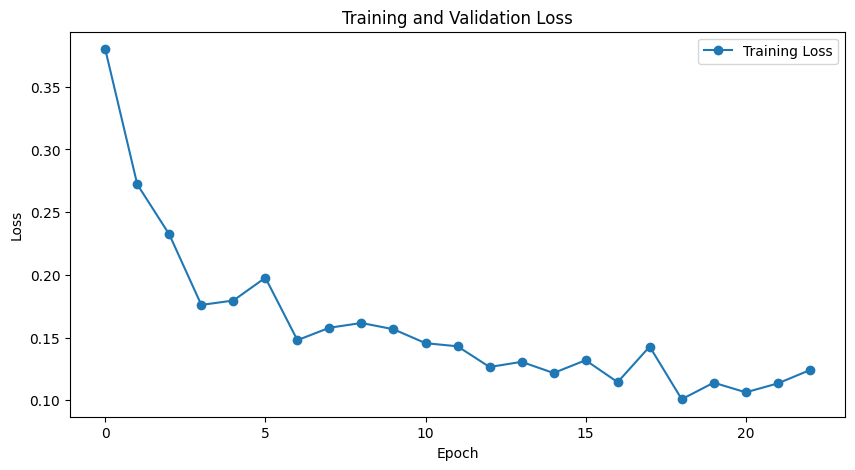

In [ ]:
import matplotlib.pyplot as plt

# Récupération des métriques d'entraînement
train_metrics = trainer.state.log_history

# Extraction des métriques spécifiques que vous souhaitez tracer (par exemple, la perte)
train_loss = [metric['loss'] for metric in train_metrics if 'loss' in metric]

# Tracé des courbes d'apprentissage
plt.figure(figsize=(10, 5))

# Plotting training loss
plt.plot(train_loss, label='Training Loss', marker='o')



plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
eval_losses = []
eval_accuracies = []

for log in trainer.state.log_history:
    if 'eval_loss' in log and 'step' in log:  # Métriques d'entraînement
        eval_losses.append(log['eval_loss'])
   
    if 'eval_accuracy' in log:  # Score F1 d'évaluation
        eval_accuracies.append(log['eval_accuracy'])

# Affichage des métriques récupérées
print("eval_losses", eval_losses)
print("eval_accuracies:", eval_accuracies)


eval_losses [0.17841841280460358, 0.15181122720241547, 0.1534700244665146, 0.16149917244911194]
eval_accuracies: [0.9567108412633546, 0.9595422966898243, 0.9572946465059257, 0.9601552921945239]


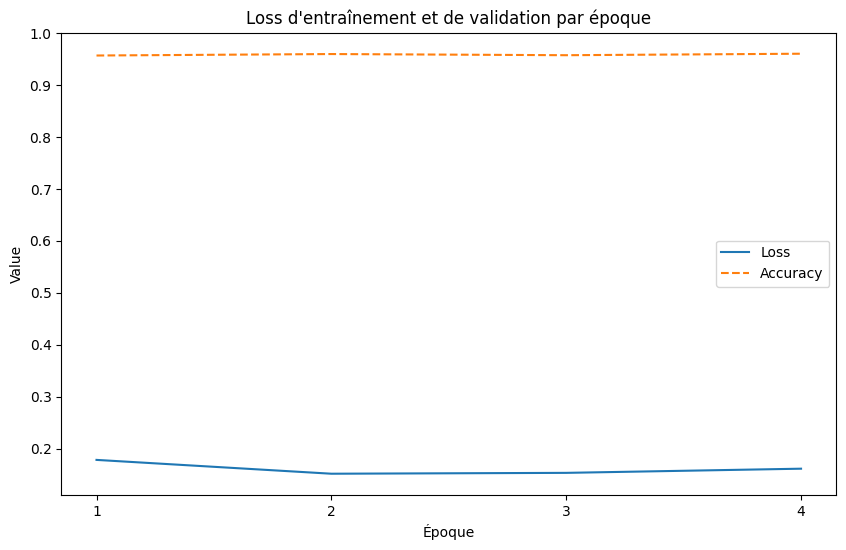

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epochs = range(1, len(eval_losses) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, eval_losses, label='Loss')
plt.plot(epochs, eval_accuracies, label='Accuracy', linestyle='--')
plt.title('Loss d\'entraînement et de validation par époque')
plt.xlabel('Époque')
plt.ylabel('Value')
plt.legend()

# Configuration pour forcer l'axe des x à utiliser des entiers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

Text(0.5, 1.0, 'Confusion Matrix après entrainnement V1')

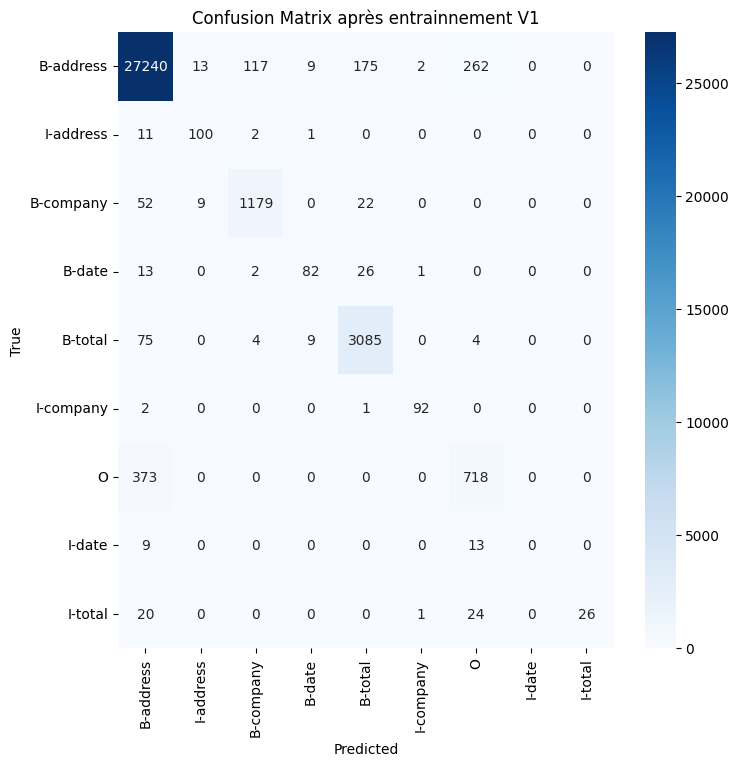

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from transformers import Trainer, TrainingArguments
from seqeval.metrics import classification_report

# Supposons que `trainer` est votre objet Trainer déjà entraîné
# et `tokenized_datasets` est votre ensemble de données tokenisé
# avec des étiquettes pour la NER

# Obtenir les prédictions
predictions, labels, _ = trainer.predict(tokenized_datasets_test)
predictions = np.argmax(predictions, axis=2)

# Aplatir les listes
true_labels = []
pred_labels = []
for i, label in enumerate(labels):
    for j, label_id in enumerate(label):
        if label_id != -100:  # Ignorer les tokens spéciaux
            true_labels.append(label_id)
            pred_labels.append(predictions[i][j])

# Convertir les indices en étiquettes textuelles (selon votre mapping d'indices)
# Vous devez définir `id2label` basé sur votre modèle ou votre Tokenizer
true_label_text = [id2label[id] for id in true_labels]
pred_label_text = [id2label[id] for id in pred_labels]

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_label_text, pred_label_text, labels=list(id2label.values()))

# Sauvegarder le graphique Seaborn dans un fichier image (par exemple, PNG)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix après entrainnement V1')

# Save the model

In [ ]:
saved_model_path='/home/azureuser/cloudfiles/code/Users/charlie.marliere/E2/distilbert-finetuned-ner/custom_model-4'
# trainer.save_model(saved_model_path)

# Evaluate

In [ ]:
predictions = trainer.predict(tokenized_datasets_eval)

In [ ]:
from tabulate import tabulate

metrics = ['precision', 'recall', 'f1', 'accuracy']
prediction_results = []

for key, val in predictions.metrics.items():
    if any(item in key for item in metrics):
        prediction_results.append([key, str(round(val,4)*100)+'%'])

print(tabulate(prediction_results, headers=['Metric', 'Score']))

Metric          Score
--------------  ------------------
test_precision  96.85000000000001%
test_recall     97.21%
test_f1         97.03%
test_accuracy   96.02000000000001%


# Inference

In [ ]:
inference= """MR. D.I.¥. (KUCHAT) SDN BHD
CO-REG:750441-W
LOT 1851-A & 1851-B, JALAN KPB 6,
KAWASAN PERINDUSTRIAN BALAKONG,
43300 SERI KEMBANGAN, SELANGOR
(GST ID No :000473792512)
(TESCO EXTRA KAJANG)
-TAX INVOICE-

BOOSTER CABLE XH-500A +*§
CE72 - 10
9001620 1X 29.90 298,90
MOTH BALLS 1506 *§
EC21-41-71 - 10/100
9063977 1X 2,10 2,10
DIY GOLD TWIST DRILL 3MM *§
LB22 - 20/1500
9071246 1X 2,50 2,50
HSS TWIST DRILL 6*160MM *§
LG32-42 - 10/400
6909906163107 1X 3.30 3,30

Item(s) : 4 Qty(s) : 4
TOTAL INCL. GSTe6K RM 37.80
CASH RM 40.00
CHANGE RM 2.20

GST Summary Amt(RM) = Tax(RM)
GST S@6% 35.66 2.14

08-03-17 13:42 SHO1 BO28 = 12 000017473
OPERATOR TRAINEE

EXCHANGE ARE ALLOWED WITHIN
7 DAY WITH RECEIPT.
STRICTLY NO CASH REFUND.

 

ee are can"""

In [ ]:
import re

def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    
    # Supprimer les caractères spéciaux
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    return text
cleaned_inference = clean_text(inference)

print(cleaned_inference)

mr di kuchat sdn bhd
coreg750441w
lot 1851a  1851b jalan kpb 6
kawasan perindustrian balakong
43300 seri kembangan selangor
gst id no 000473792512
tesco extra kajang
tax invoice

booster cable xh500a 
ce72  10
9001620 1x 2990 29890
moth balls 1506 
ec214171  10100
9063977 1x 210 210
diy gold twist drill 3mm 
lb22  201500
9071246 1x 250 250
hss twist drill 6160mm 
lg3242  10400
6909906163107 1x 330 330

items  4 qtys  4
total incl gste6k rm 3780
cash rm 4000
change rm 220

gst summary amtrm  taxrm
gst s6 3566 214

080317 1342 sho1 bo28  12 000017473
operator trainee

exchange are allowed within
7 day with receipt
strictly no cash refund

 

ee are can


In [ ]:
from transformers import pipeline

token_classifier = pipeline(
    "token-classification", model=saved_model_path, aggregation_strategy="simple"
)
results = token_classifier(cleaned_inference)

In [ ]:

prediction_results = []
for each_entity in results:
    prediction_results.append([each_entity['word'], each_entity['entity_group']])

print(tabulate(prediction_results, headers=['Word', 'Predictions']))

Word      Predictions
--------  -------------
m         address
##r       address
di        company
k         address
##uch     address
##at      address
s         address
##dn      address
b         address
##h       address
##d       address
core      address
##g       address
##75      address
##0       address
##44      address
##1       address
##w       address
lot       address
1851      address
##a       address
1851      address
##b       address
j         address
##alan    address
k         address
##p       address
##b       address
6         address
ka        address
##was     address
##an      address
per       address
##ind     address
##ust     address
##rian    address
b         address
##ala     address
##kon     address
##g       address
43        address
##30      address
##0       address
se        address
##ri      address
k         address
##em      address
##bang    address
##an      address
se        address
##lang    address
##or      address
g         address


https://www.kaggle.com/code/behnamkhorshidian/ch4-named-entity-recognition